In [ ]:
import os
import numpy as np

from sklearn.model_selection import train_test_split

import keras
from keras import layers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
print(os.getcwd())

/content


In [ ]:
os.chdir('drive/My Drive/FLNN_MP/')

In [ ]:
# Load the preprocessed datasets
X_train = np.load('Data/X_train_3.npy', allow_pickle=True)
X_test = np.load('Data/X_test_3.npy', allow_pickle=True)

d_train = np.load('Data/d_train_3.npy', allow_pickle=True)
d_test = np.load('Data/d_test_3.npy', allow_pickle=True)

In [ ]:
# Parameters
lr = 0.0001
drop_out_rate = 0.3
input_shape = (8000,1)

In [ ]:
# Conv 1D Model 

def ExtraAugConv1D_4(input_shape, drop_out_rate):
    inputs = keras.Input(shape=input_shape)
    
    x = layers.Conv1D(8, 100, strides=1, padding='same', activation='tanh')(inputs)
    x = layers.MaxPool1D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.SpatialDropout1D(drop_out_rate)(x)

    x = layers.Conv1D(16, 60, strides=1, padding='same', activation='relu')(x)
    x = layers.MaxPool1D(pool_size=2)(x)
      x = layers.BatchNormalization()(x)

    x = layers.SpatialDropout1D(drop_out_rate)(x)

    x = layers.Conv1D(24, 40, strides=1, padding='same', activation='tanh')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)

    x = layers.SpatialDropout1D(drop_out_rate)(x)

    x = layers.Conv1D(32, 20, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)

    x = layers.Dropout(drop_out_rate)(x)

    x = layers.Dense(64, activation='tanh')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(drop_out_rate)(x)
    
    x = layers.Flatten()(x)
        
    outputs = layers.Dense(30, activation='softmax')(x)
    
    return keras.Model(inputs, outputs)

ExtraAugConv1D_4 = ExtraAugConv1D_4(input_shape, drop_out_rate)

In [ ]:
# Model Summary
ExtraAugConv1D_4.compile(
    optimizer=keras.optimizers.Adam(lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ExtraAugConv1D_4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 8000, 8)           808       
_________________________________________________________________
batch_normalization_7 (Batch (None, 8000, 8)           32        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 4000, 8)           0         
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 4000, 8)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 4000, 16)          7696      
_________________________________________________________________
batch_normalization_8 (Batch (None, 4000, 16)          64  

In [ ]:
# Model Fit
ExtraAugConv1D_4_h = ExtraAugConv1D_4.fit(
    X_train, 
    d_train,
    validation_data=[X_test, d_test],
    epochs= 100
)

Train on 58896 samples, validate on 25242 samples
Epoch 1/100
58896/58896 [==============================] - 59s 997us/step - loss: 4.5044 - accuracy: 0.0647 - val_loss: 3.6052 - val_accuracy: 0.1295
Epoch 2/100
58896/58896 [==============================] - 51s 859us/step - loss: 3.9446 - accuracy: 0.1205 - val_loss: 3.3266 - val_accuracy: 0.2050
Epoch 3/100
58896/58896 [==============================] - 51s 861us/step - loss: 3.4551 - accuracy: 0.1805 - val_loss: 3.0421 - val_accuracy: 0.2661
Epoch 4/100
58896/58896 [==============================] - 50s 855us/step - loss: 3.0868 - accuracy: 0.2344 - val_loss: 2.7136 - val_accuracy: 0.3216
Epoch 5/100
58896/58896 [==============================] - 51s 864us/step - loss: 2.7670 - accuracy: 0.2857 - val_loss: 2.9685 - val_accuracy: 0.3221
Epoch 6/100
58896/58896 [==============================] - 51s 859us/step - loss: 2.4831 - accuracy: 0.3402 - val_loss: 3.2250 - val_accuracy: 0.3127
Epoch 7/100
58896/58896 [=========================

In [ ]:
# Save the model
ExtraAugConv1D_4.save('Outputs/ExtraAugConv1D_4.h5')

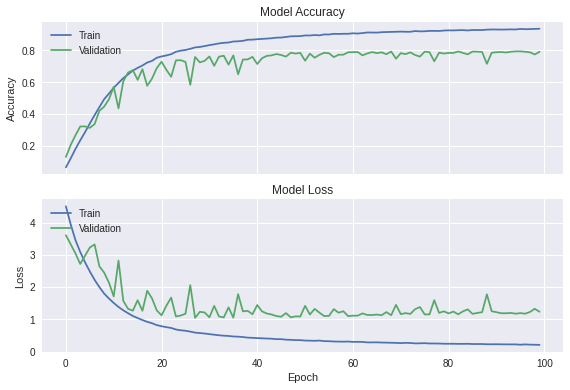

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('seaborn')
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(ExtraAugConv1D_4_h.history['accuracy'])
ax[0].plot(ExtraAugConv1D_4_h.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='upper left')
ax[1].plot(ExtraAugConv1D_4_h.history['loss'])
ax[1].plot(ExtraAugConv1D_4_h.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')
fig.tight_layout(pad=1)